Ref: Udemy, Machine learning, data science and deep learning with python

_https://github.com/Aschwins/udemy-frank_
Lecturer: Frank Kane

# Introducing Pandas

Pandas is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

It's one of three libraries you'll encounter repeatedly in the field of data science:

## Pandas
Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information.

## NumPy
Usually you'll encounter "NumPy arrays", which are multi-dimensional array objects. It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays. NumPy arrays are mainly important because of...

## Scikit_Learn
The machine learning library we'll use throughout this course is scikit_learn, or sklearn, and it generally takes NumPy arrays as its input.

So, a typical thing to do is to load, clean, and manipulate your input data using Pandas. Then convert your Pandas DataFrame into a NumPy array as it's being passed into some Scikit_Learn function. That conversion can often happen automatically.

Let's start by loading some comma-separated value data using Pandas into a DataFrame:


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("./data/PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:
its like headline

In [2]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


You can also view the end of your data with tail():

In [3]:
df.tail(4)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [4]:
df.shape

(13, 7)

The total size of the data frame is the rows * columns:

In [5]:
df.size

91

The len() function gives you the number of rows in a DataFrame:

In [6]:
len(df)

13

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [7]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [8]:
df['Hired']

0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object

In [9]:
df[['Employed?', 'Hired']]

,Employed?,Hired
0,Y,Y
1,N,Y
2,N,N
3,Y,Y
4,N,N
5,N,Y
6,Y,Y
7,N,Y
8,Y,Y
9,N,N


You can also extract a given range of rows from a named column, like so:

In [10]:
df['Hired'][:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Hired, dtype: object

Or even extract a single value from a specified column / row combination:

In [11]:
df['Hired'][5]

'Y'

To extract more than one column, you pass in an array of column names instead of a single one:

In [12]:
df[['Years Experience', 'Hired']]


,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N
5,0,Y
6,5,Y
7,3,Y
8,15,Y
9,0,N


In [13]:
# this is a dataframe
type(df[['Years Experience', 'Hired']])

pandas.core.frame.DataFrame

You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [14]:
df[['Years Experience', 'Hired']][:5]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N


Sorting your DataFrame by a specific column looks like this:

In [15]:
# sort_values works on the entire dataframe as it sorts the entire dataset.
# Hence you apply df.sort_values('column to sort by')
df.sort_values(['Years Experience', 'Previous employers'], ascending=[True, False])


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 856.0+ bytes


In [17]:
df.sort_values(['Years Experience', 'Level of Education'], ascending=(True, False))
# since years_expreince and level of education are of diff types, the sort will sort the years experince only.
# lets swap the column names and see what happens


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
5,0,N,0,PhD,Y,Y,Y
12,0,N,0,PhD,Y,N,Y
1,0,N,0,BS,Y,Y,Y
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


In [18]:
df.sort_values(['Level of Education','Years Experience'], ascending=(True, False))
# since years_expreince and level of education are of diff types, the sort will sort the years experince only.
# lets swap the column names and see what happens
# here only the level of edu is sorted out and years expereinceed is ignored.


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
8,15,Y,5,BS,N,N,Y
0,10,Y,4,BS,N,N,Y
2,7,N,6,BS,N,N,N
11,4,Y,1,BS,N,Y,Y
7,3,N,1,BS,N,Y,Y
1,0,N,0,BS,Y,Y,Y
9,0,N,0,BS,N,N,N
6,5,Y,2,MS,N,Y,Y
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [19]:
# if the sort_values does not work, make sure you are working with the number and not strings.
# here is an example:
dfex = pd.DataFrame({"Col": ['1', '2', '3', '10', '20', '19']})
dfex


,Col
0,1
1,2
2,3
3,10
4,20
5,19


In [20]:
# lets sort by values
dfex.sort_values('Col')
# as you can see the list is not sorted and that is because it is string. and actually 
# sort_values is returning you a lexsorted result.
# lets check the dataframe info

,Col
0,1
3,10
5,19
1,2
4,20
2,3


In [21]:
dfex.info()
# it is an object and not an int.
# Lets convert it to a number
type(pd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Col     6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


module

In [22]:
dfex['Col'] = pd.to_numeric(dfex['Col'])
dfex.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Col     6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


In [23]:
dfex.sort_values('Col')
# and now it works.

,Col
0,1
1,2
2,3
3,10
5,19
4,20


You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [24]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

Pandas even makes it easy to plot a Series or DataFrame - just call plot():

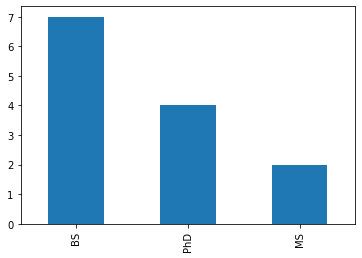

In [25]:
degree_counts.plot(kind='bar') #open ploting pandas documentation

## Exercise

Try extracting rows 5-10 of our DataFrame, preserving only the "Previous Employers" and "Hired" columns. Assign that to a new DataFrame, and create a histogram plotting the distribution of the previous employers in this subset of the data.

In [26]:
dfTest = pd.read_csv('./data/PastHires.csv')

# dfTest.iloc[5:11] 
lala = dfTest[['Previous employers', 'Hired']].iloc[5:11]
# lele =lala.sort_values(['Previous employers'])
lala
 

,Previous employers,Hired
5,0,Y
6,2,Y
7,1,Y
8,5,Y
9,0,N
10,1,N


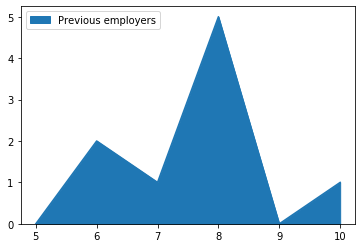

In [27]:
lala.plot(kind='area'); #open plot documentation

# Standard Diviation and Variance

## Variance 
\begin{align}
\sigma^2 \\
\end{align}



\begin{align}
\sigma^2 \\
\end{align}
Variance measures how 'spread out ' the data is
variance sigma squared is the avg of the sqrd diff s from the mean.
To find the var in a data set (1,4, 5, 4, 8)
1. find the mean which is the sum/count of elements = Sum(All elements)/5 = 4.4 
2. find the diff from the meanf (-3.4, -0.4, 0.6, -0.4, 3.6)
3. find the sqrd diff (11.56, 0.16, ...)
4. find the avg of the sqrd diff -> sigma sqrd = (11.56,....)/5 = 5.04


## Standard Deviation
Just the squared root of the variance

Note: If working with a sample data instead of entire sataset, 
    - you want to use the sample variance instead of population vairance
    - For N samples, you just divide the squired vairances by N-1 instead of N
    - So in our example we computed the population vaiance  (sigma sqrd) = elements/count of elements (which is N)
    - But the sample vairance would be divided by N-1

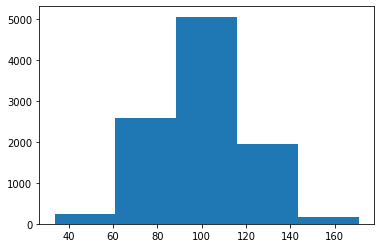

In [28]:
import numpy as np
import matplotlib.pyplot as plt
incomes = np.random.normal(100, 20, 10000) # Centered around the 100, with std = 20 and 10,000 datapoints
plt.hist(incomes, 5)
plt.show()

In [29]:
incomes.std()

19.843066703015154

In [30]:
incomes.var()

393.74729618030864

# Probability Density Function

## Conitnues data
Gives you the probablity of a data point falling within some gien range of a given value.
    Note: this is for continues data and not discrete date
    

# Discreate data - Probability Mass Function

# Discrete data:
Tell you the probability of a discrete value occuring.within your data sets


# Examples of Data Distributions
## Uniform Distribution



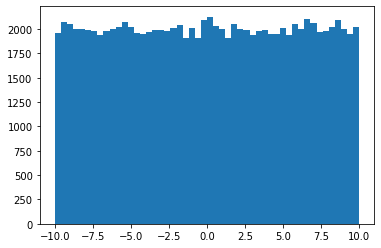

In [31]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

values = np.random.uniform(-10.0, 10.0, 100000)
plt.hist(values, 50)
plt.show()

### _A uniform distribution just means there is a flat constant probability of a value occuring within a given range_

# Normal / Gaussian
Visualize the probability density function:


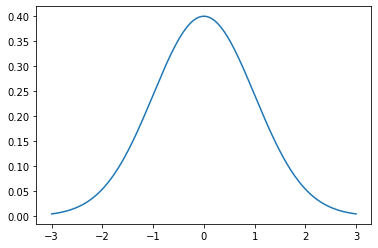

In [32]:

from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))

# Regression 

All it is, is trying to fit a curve to a set of values and you can use that function or a curve to predict new values
that you haven't seen yet.

## Linear regression
Fitting a straight line to a data set
It is confusing term and fancy teminology. 

It uses a technique to try and minimize the sqrd error between each point and the line
and the error is just the distance between the datapoint and the line you have.
Next you sum the squares of all these errors. Very similar to the variance we did earlier on.

This may be also called least squares. 
- Gradient descent ia an alternate method
- Basically iterates to find the line that best follows the contours defined y the data
- Can make sense when dealing with 3d data
- usually least square is prefectly fine.


# How do I know how good my line from linear regression is ?
That is where r-squared comes in.
r-squared is also known as the coefficient of determination measures.
Which basically means: the fraction of the total variation in Y that is captured by the model.
Otherwords, how well your line follows the varation of the data points that are happening?

- Are we getting equal amount of variance in either side of the line or not?
- That is what r-squared is measruing.
- to compute that; 1- (sum of sqrd errors/sum of sqrd variation from mean)

## Interpreting r-squared
 - Ranges from 0 to 1
    - 0 is bad (none of the variance is captured), 1 is good (all of the variance is captured)
 - so high r-squared value is a good fit and low is a bad fit.

# Polynomial Regression

Sometimes your data is not a good fit for a straight line, that is where Polynomial regression comes in.

The higher order the ploynomial equation, the more complex the curve.

**Note** 
Be aware of overfitting
- Don't use more degrees than you need
- Visualize your data first to see how complex of a curve there might really be
- Visualize the fit - is your curve going out of its way to accommodate ouliers?
- A high r-squared simply means yuor curve fits your training data well but it may not be a good predictor.
- Later we will talk about other tools or principles to detect overfitting.

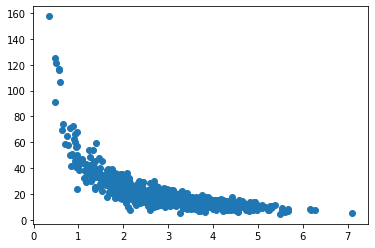

In [33]:

%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
# with random.seed it ensure that the next random ops are deterministic and you always endup with the same value.
# This way everytime you run this code you end up with the same results.


pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount);

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [34]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

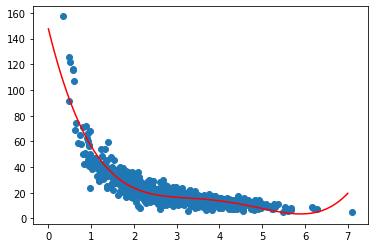

In [35]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks ok, lets measure the r-squared error.

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.8293766396303073


# Multivairate Regression and Predicting Car Price

A regression that takes more than one variable into account. More than one feature.

ie: Predicting a price for a car based on its many attributes body style, brankd, mileaage, etc)

Still uses least squares
- we just end up with coefficients for each factor and the beta (or the weight) tells us how important each feature is.
- Of course you have to normalize your data first
- Get rid of the ones that don't matter
- you can still measure fit with r squared
- also you need to assume the different factors are not themselves dependent on each other.

In the case of car price predication, if we pick both millage and age of the car as two features, we know that most likly
there are highly correated. So it this model won't work. In this case we may just take one of these features

https://github.com/Aschwins/udemy-frank/blob/master/MultivariateRegression.ipynb

In [37]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [38]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Our plan is to predict the price based on lets say 3 features.
**Note** this data is categorical (make, model, trim, type). They are just strings that represent some brand name

With categorical data you can't really use that for a regression model. Recall regression, we had a coff that we used
infront of numerical values that represented each feature.

And in this case there is no reall way to map buick to a number. So we will skip those over.
Now if there were some ordinal values that we could covert them into numbers, that would have been possible.
So we will stick with Mileage, Cylinder and Doors that may make a diff on the price.



In [72]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Leather']]
y = df['Price']
# Scale.fit will normalize all the values for these features to -1 to 1  range. 
# so that we can compare these coeff in a meaningful way.

X[['Mileage', 'Cylinder', 'Leather']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Leather']].values)
print (X)

est = sm.OLS(y, X).fit()

est.summary()

      Mileage  Cylinder   Leather
0   -1.417485   0.52741  0.617611
1   -1.305902   0.52741 -1.619142
2   -0.810128   0.52741 -1.619142
3   -0.426058   0.52741 -1.619142
4    0.000008   0.52741  0.617611
..        ...       ...       ...
799 -0.439853   0.52741 -1.619142
800 -0.089966   0.52741 -1.619142
801  0.079605   0.52741 -1.619142
802  0.750446   0.52741 -1.619142
803  1.932565   0.52741 -1.619142

[804 rows x 3 columns]


/Users/darius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/darius/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.062
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              17.74
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                    3.74e-11
Time:                        12:03:53   Log-Likelihood:                         -9207.7
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.844e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1252.2947    805.042     -1.556      0.120   -2832.536     327.947
Cylinder    5498.9315    807.347      6.811      0.000    3914.165    7083.697
Leather     1138.8831    806.997      1.411      0.159    -445.196    2722.962
==============================================================================
Omnibus:                      194.384   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.896
Skew:                           1.410   Prob(JB):                     1.06e-81
Kurtosis:                       4.782   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table of coefficients above gives us the values to plug into an equation of form: B0 + B1 * Mileage + B2 * model_ord + B3 * doors In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients. Could we have figured that out earlier?

In [75]:
y.groupby(df.Type).mean()

Type
Convertible    40831.705847
Coupe          17726.931831
Hatchback      14170.927809
Sedan          21067.927487
Wagon          22859.245356
Name: Price, dtype: float64

# Multi-Level Model Intro
The concept si that some effects happen at various levels.
Example: your health may depend on a hierarchy of the health of your cell, organs, your family, city you live in...
    The challenge is to see how to model this and identify the factor at each level that will impact.
    
    Example: SAT scores may be predicated based on the genetics of individual childern
        